In [1]:
import pandas as pd
import wrangle as w
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [3]:
original, uni_count_vect, bi_count_vect, tri_count_vect = w.wrangle_glassdoor()
train, val, test = original

Possible Questions:

Common words between 3-star companies and 4-star companies?

Review Lengths between 3-star companies and 4-star companies?

Unique words for 3-star companies and 4-star companies?

Number of unique words for 3-star companies and 4-star companies?


### Sentiment

In [37]:
import nltk.sentiment
# we call nltk.sentiment.SentimentIntensityAnalyser()
# use polarity_scores from that object

sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [38]:
sia.polarity_scores(train.iloc[2]['cons_lemmatized'] + train.iloc[2]['pros_lemmatized'])

{'neg': 0.14, 'neu': 0.586, 'pos': 0.274, 'compound': 0.9999}

In [39]:
train

,pros,cons,name,rating,ceo_approval,friend_recommendation,pros_cleaned,pros_lemmatized,cons_cleaned,cons_lemmatized,binned_rating,binned_rating_int
url,,,,,,,,,,,,
https://www.glassdoor.com/Reviews/Juniper-Networks-Reviews-E7224.htm,"Great work culture, excellent work-life balanc...",engineers paid (i feel) less compared to other...,Juniper Networks,4.3,92.0,86.0,great work culture excellent worklife balance\...,great work culture excellent worklife balance ...,engineers paid i feel less compared to other s...,engineer paid feel le compared software compan...,Four,4
https://www.glassdoor.com/Reviews/Bath-and-Body-Works-Reviews-E13902.htm,Working quickly on the sales floor\nThe compan...,Will stick you behind the cash register once t...,Bath & Body Works,3.8,79.0,70.0,working quickly on the sales floor\nthe compan...,working quickly sale floor company offered gre...,will stick you behind the cash register once t...,stick behind cash register know ' good floor w...,Three,3
https://www.glassdoor.com/Reviews/Stanley-Black-and-Decker-Reviews-E350350.htm,Treats employees well. Good work environment a...,I have no cons to share.\nSomewhat frequent re...,Stanley Black & Decker,3.5,64.0,63.0,treats employees well good work environment an...,treat employee well good work environment room...,i have no cons to share\nsomewhat frequent reo...,con share somewhat frequent reorg change compa...,Three,3
https://www.glassdoor.com/Reviews/Morningstar-Reviews-E3299.htm,"- Coworkers are amicable, and they're overall ...",- Base pay for the area could be slightly high...,Morningstar,4.1,94.0,86.0,coworkers are amicable and they ' re overall v...,coworkers amicable ' overall supportive unlimi...,base pay for the area could be slightly higher...,base pay area could slightly higher bonus prog...,Four,4
https://www.glassdoor.com/Reviews/Chipotle-Reviews-E15228.htm,Everyone there did a great job of being an act...,Constantly greeting people by working on the f...,Chipotle,3.4,56.0,53.0,everyone there did a great job of being an act...,everyone great job actual team constant open c...,constantly greeting people by working on the f...,constantly greeting people working front line ...,Three,3
...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.glassdoor.com/Reviews/NOV-Reviews-E3306.htm,The environment and culture are marvellous and...,Nothing bad to say about the company.\nOccasio...,NOV,3.7,78.0,71.0,the environment and culture are marvellous and...,environment culture marvellous amazing great b...,nothing bad to say about the company\noccasion...,nothing bad say company occasional heavy workl...,Three,3
https://www.glassdoor.com/Reviews/VMware-Reviews-E12830.htm,"Optimistic, innovative environment, smart peop...",There are no cons I have encountered till date...,VMware,4.3,80.0,86.0,optimistic innovative environment smart people...,optimistic innovative environment smart people...,there are no cons i have encountered till date...,con encountered till date decisionmaking slow ...,Four,4
https://www.glassdoor.com/Reviews/Dollar-General-Reviews-E1342.htm,Growth opportunities Company culture Serving o...,Volume of work Urgency expectations Base salar...,Dollar General,2.7,36.0,34.0,growth opportunities company culture serving o...,growth opportunity company culture serving oth...,volume of work urgency expectations base salar...,volume work urgency expectation base salary le...,Two,2


In [22]:
train['pros_sentiment'] = train['pros_lemmatized'].apply(lambda doc:\
                                                   sia.polarity_scores(doc)['compound'])
train['cons_sentiment'] = train['cons_lemmatized'].apply(lambda doc:\
                                                   sia.polarity_scores(doc)['compound'])
train['total_sentiment'] =(train['pros_lemmatized'] + train['cons_lemmatized'])\
                            .apply(lambda doc: sia.polarity_scores(doc)['compound'])

In [24]:
train.groupby('binned_rating_int')[['pros_sentiment', 'cons_sentiment', 'total_sentiment']]\
                                    .mean()

,pros_sentiment,cons_sentiment,total_sentiment
binned_rating_int,,,
2,0.999933,0.149378,0.999922
3,0.999955,0.285908,0.999961
4,0.999983,0.666374,0.999989


In [34]:
train.groupby('binned_rating_int')[['pros_sentiment', 'cons_sentiment', 'total_sentiment']]\
                                    .median()

,pros_sentiment,cons_sentiment,total_sentiment
binned_rating_int,,,
2,0.9999,0.9946,0.9999
3,1.0000,0.9858,1.0000
4,1.0000,0.9963,1.0000


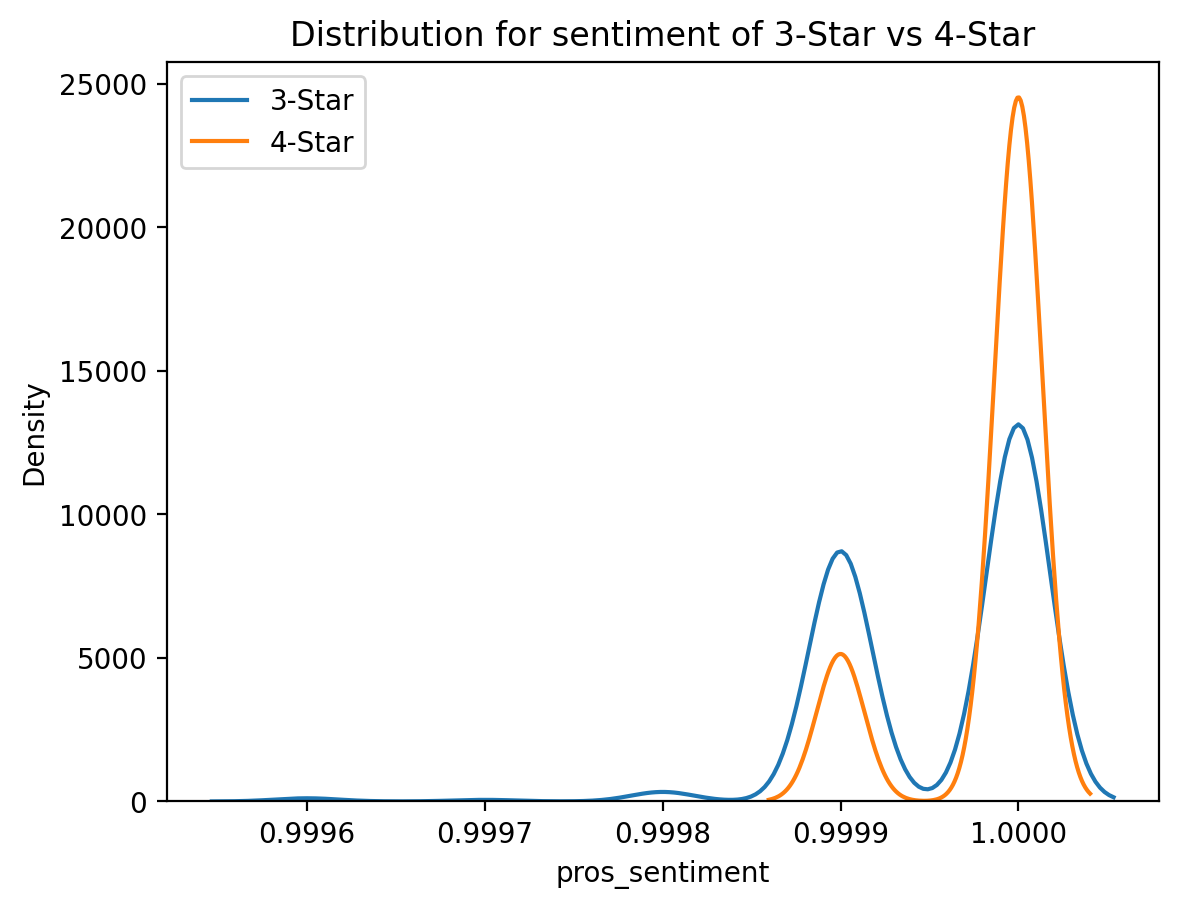

In [28]:
sns.kdeplot(train[train['binned_rating_int'] ==3]['pros_sentiment'], label='3-Star')
sns.kdeplot(train[train['binned_rating_int'] ==4]['pros_sentiment'], label='4-Star')

plt.legend(['3-Star', '4-Star'])
plt.title("Distribution for sentiment of 3-Star vs 4-Star")
plt.show()

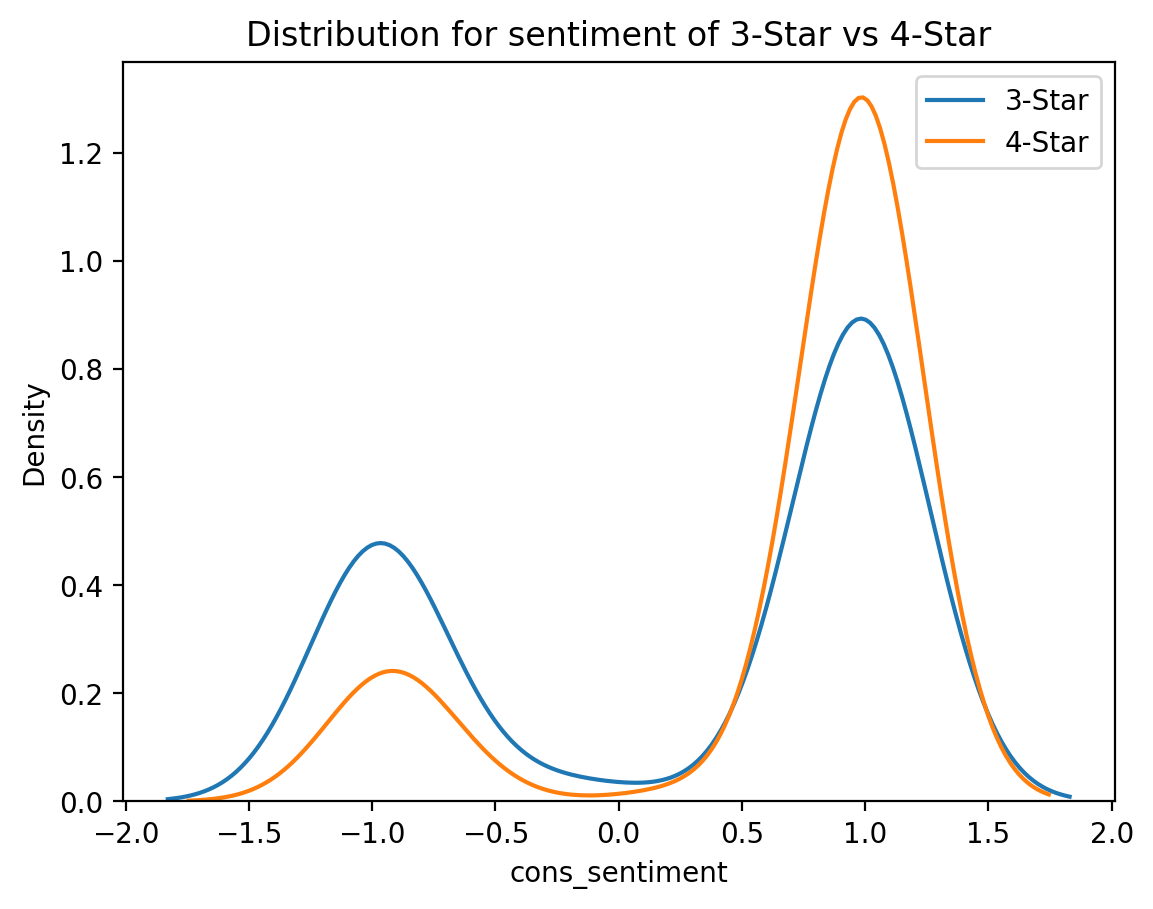

In [29]:
sns.kdeplot(train[train['binned_rating_int'] ==3]['cons_sentiment'], label='3-Star')
sns.kdeplot(train[train['binned_rating_int'] ==4]['cons_sentiment'], label='4-Star')

plt.legend(['3-Star', '4-Star'])
plt.title("Distribution for sentiment of 3-Star vs 4-Star")
plt.show()

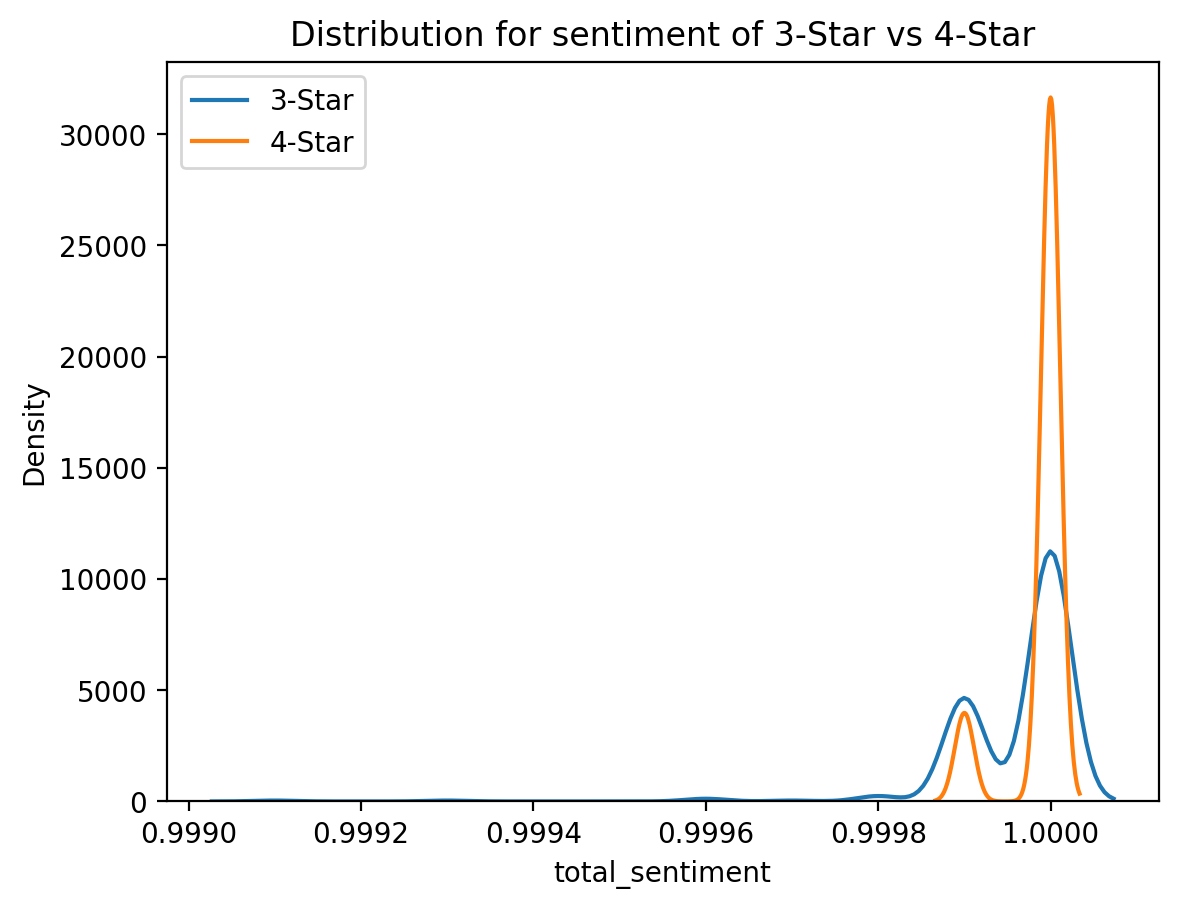

In [30]:
sns.kdeplot(train[train['binned_rating_int'] ==3]['total_sentiment'], label='3-Star')
sns.kdeplot(train[train['binned_rating_int'] ==4]['total_sentiment'], label='4-Star')

plt.legend(['3-Star', '4-Star'])
plt.title("Distribution for sentiment of 3-Star vs 4-Star")
plt.show()

How do sentinment scores correlate with ratings?

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_42595/1222473334.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(train.corr().iloc[1:,:-1]),k=1)
/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_42595/1222473334.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr().iloc[1:,:-1], mask=mask, linewidths=.5, annot=True,


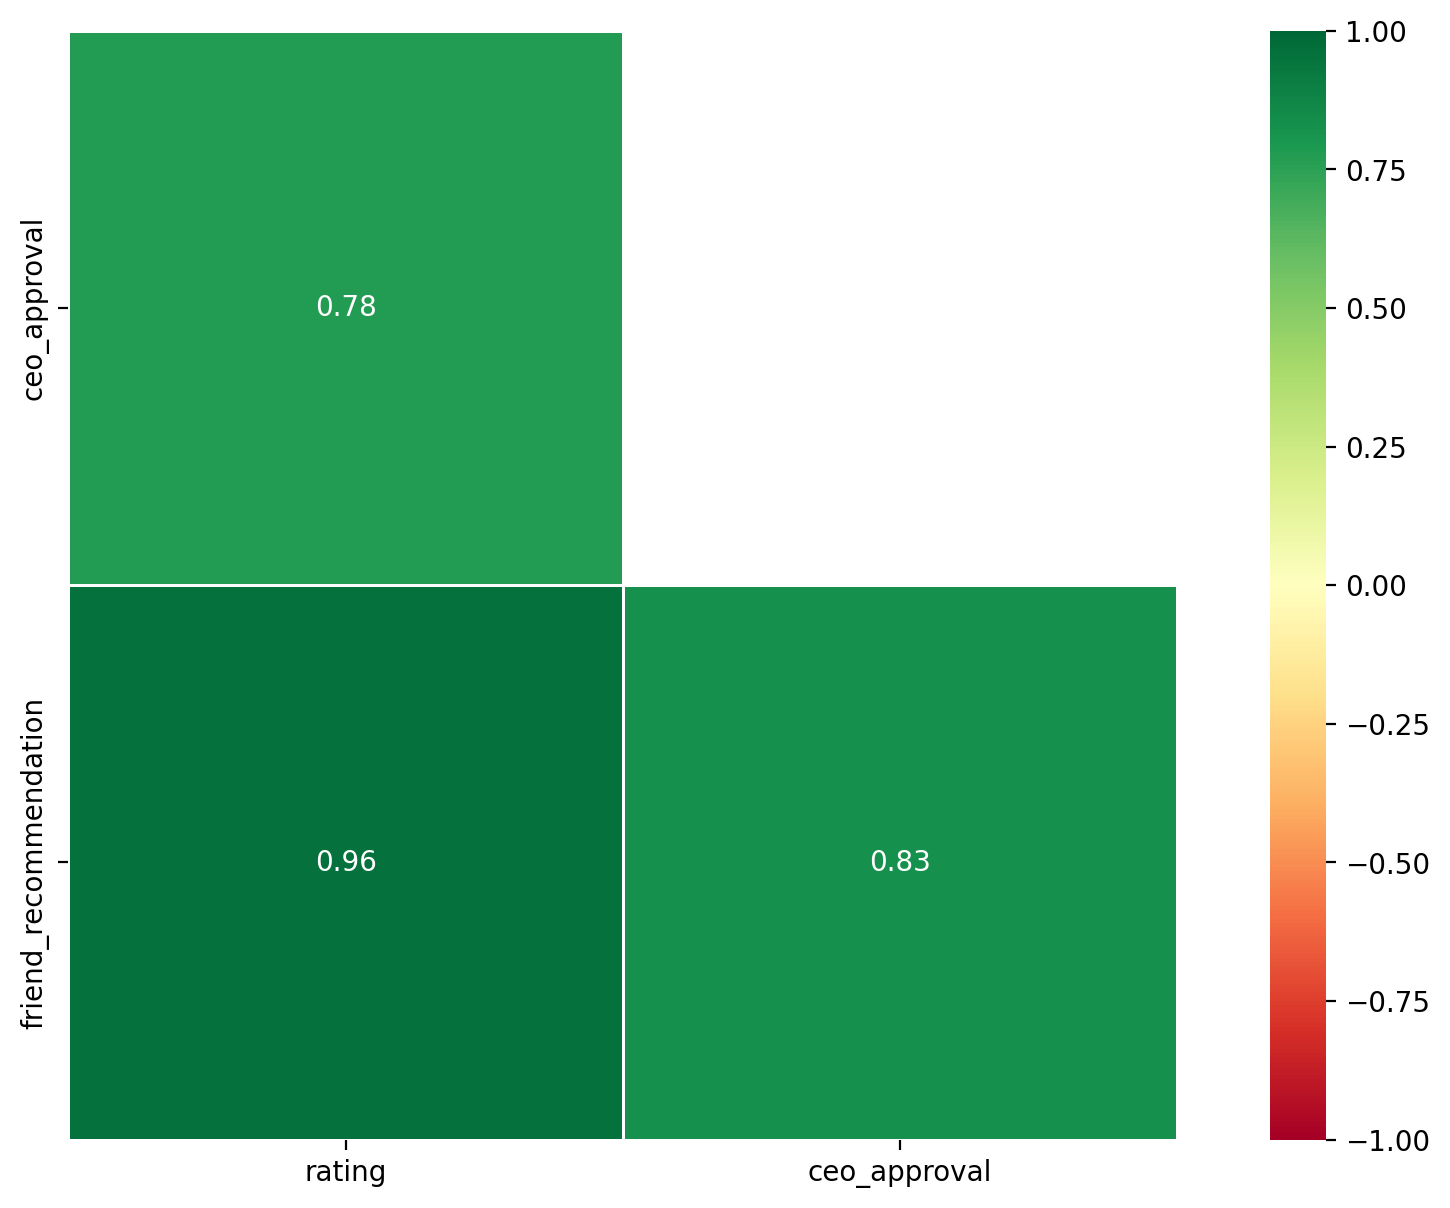

In [40]:
plt.figure(figsize=(len(train.columns), len(train.columns) * .6))

mask = np.triu(np.ones_like(train.corr().iloc[1:,:-1]),k=1)
sns.heatmap(train.corr().iloc[1:,:-1], mask=mask, linewidths=.5, annot=True,
                     cmap='RdYlGn', vmin=-1, vmax=1, square=True)
plt.show()

In [42]:
train.groupby('binned_rating_int')['ceo_approval'].mean()

binned_rating_int
2    36.600000
3    69.134211
4    86.675393
Name: ceo_approval, dtype: float64

In [43]:
train.groupby('binned_rating_int')['friend_recommendation'].mean()

binned_rating_int
2    34.800000
3    62.594737
4    81.869110
Name: friend_recommendation, dtype: float64

In [ ]:
def generate_ngrams(text, ):
    words = text.split()
    trigrams = []

    if len(words) < 3:
        return trigrams

    for i in range(len(words) - 1):
        if len(words[i]) > 1 and len(words[i+1]) > 1:
            trigram = " ".join(words[i:i+3])
            trigrams.append(trigram)

    return trigrams

***Do 4-star companies have higher CEO approvals than 3-star companies?***

In [4]:
from scipy import stats

Plot Distibutions

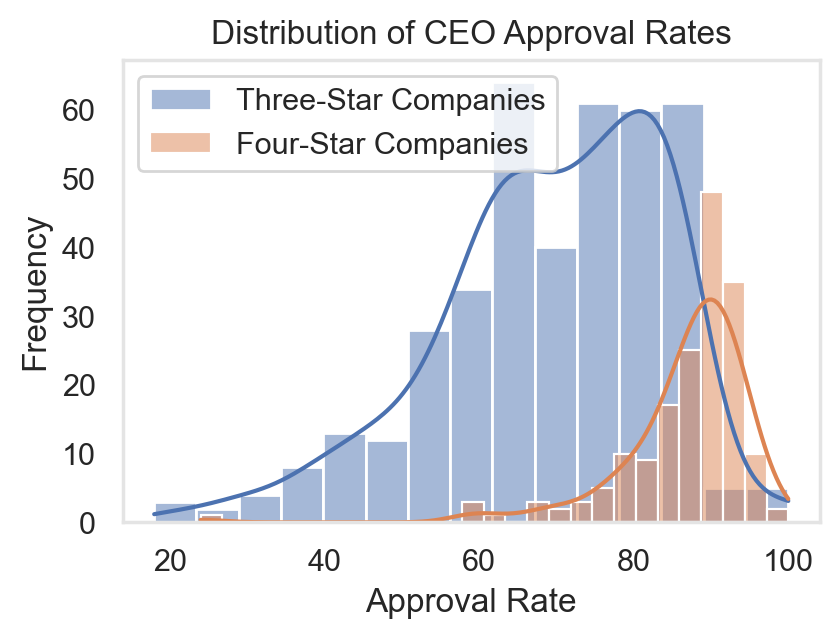

In [232]:
plt.figure(figsize=(4.5,3))
# Plot histogram for Sample 1
sns.histplot(train[train['binned_rating_int']==3]['ceo_approval'],
             kde=True, alpha=0.5, label="Three-Star Companies")

# Plot histogram for Sample 2
sns.histplot(train[train['binned_rating_int']==4]['ceo_approval'],
             kde=True, alpha=0.5, label="Four-Star Companies")

# Add labels and title to the plot
plt.xlabel('Approval Rate')
plt.ylabel('Frequency')
plt.title('Distribution of CEO Approval Rates')

# Add legend
plt.legend()

Verify Assumptions

- Independence: We will assume the companies are independent
- Normality: We can assume normality. The samples are large 

In [227]:
train['binned_rating_int'].value_counts()[:2]

3    400
4    174
Name: binned_rating_int, dtype: int64

Verify Equal Variances

In [230]:
print(f"CEO Approval Variance for Three-Star Companies: {train[train['binned_rating_int']==3]['ceo_approval'].var()}")
print(f"CEO Approval Variance for Four-Star Companies: {train[train['binned_rating_int']==4]['ceo_approval'].var()}")

# Levene test
stat, p_levene = stats.levene(train[train['binned_rating_int']==3]['ceo_approval'],
                              train[train['binned_rating_int']==4]['ceo_approval'])
print(f'Levene Test: stat={stat}, p_value={p_levene}')
if p_levene < .05:
    print('we cannot assume equal variances')
else:
    print('we will assume equal variances')

CEO Approval Variance for Three-Star Companies: 215.1174874686717
CEO Approval Variance for Four-Star Companies: 77.08780147498508
Levene Test: stat=66.44964405426119, p_value=2.27575684786021e-15
we cannot assume equal variances


Compute t-stat and p-value

In [231]:
stats.ttest_ind(train[train['binned_rating_int']==3]['ceo_approval'], 
                train[train['binned_rating_int']==4]['ceo_approval'],
                equal_var=False)

Ttest_indResult(statistic=-17.32229437170221, pvalue=2.360720156868263e-53)

There is a significant difference in CEO approvals between Three-star and Four-star companies.

In [49]:
train.groupby('binned_rating')['ceo_approval'].mean()[1:].reset_index()

,binned_rating,ceo_approval
0,Three,69.482500
1,Four,86.637931


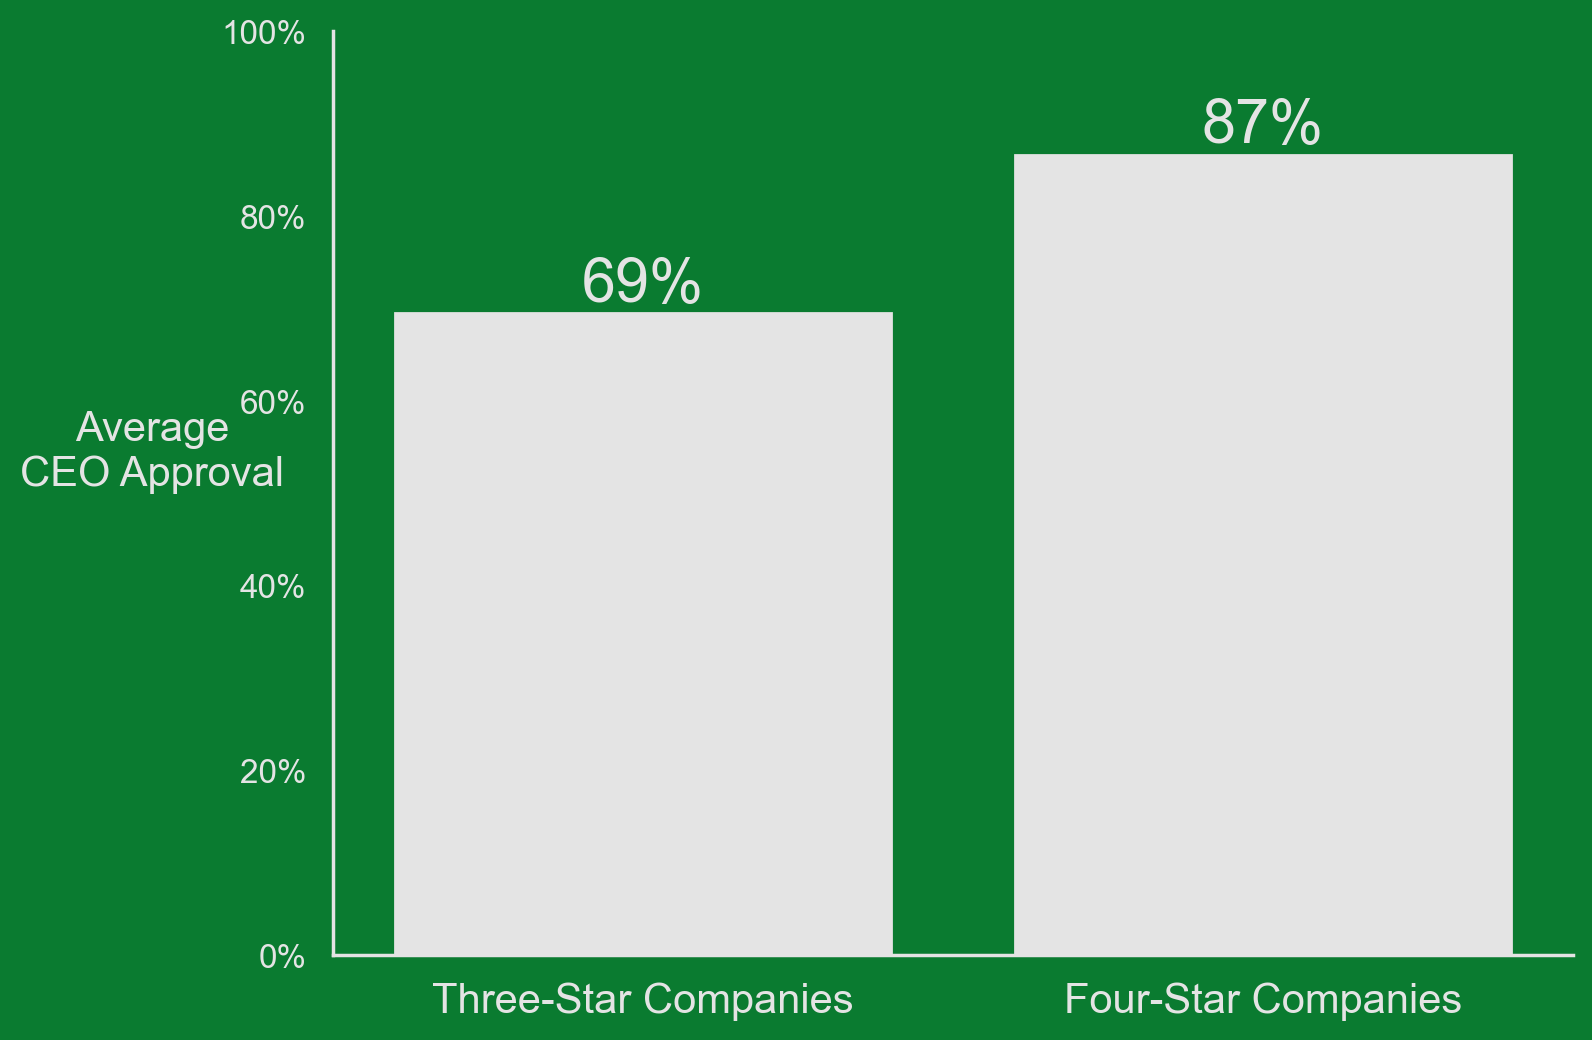

In [137]:
# Assuming you have filtered your data as follows:
ceo_approval_3 = train[train['binned_rating_int'] == 3]['ceo_approval']
ceo_approval_4 = train[train['binned_rating_int'] == 4]['ceo_approval']

# Calculate the means for both sets of CEO approvals
mean_approval_3 = ceo_approval_3.mean()
mean_approval_4 = ceo_approval_4.mean()

# Create a DataFrame for plotting
data = pd.DataFrame({'Binned Rating': ['Three-Star Companies', 'Four-Star Companies'],
                     'Mean CEO Approval': [mean_approval_3, mean_approval_4]})

# Set up the plot
sns.set(style="white", rc={"axes.edgecolor": "#e4e4e4"})
plt.figure(figsize=(8, 6))
# Create the barplot
sns.barplot(x='Binned Rating', y='Mean CEO Approval',
            data=data, color='#e4e4e4', edgecolor='#e4e4e4')

# Add labels and a title
plt.xlabel('')
plt.xticks(fontsize=15)
plt.ylabel('Average\nCEO Approval', rotation=0,
           labelpad=25, color='#e4e4e4', fontsize=15)
plt.yticks(range(0, 101, 20),
           labels=[f'{x}%' for x in range(0, 101, 20)],
           fontsize=12)

# Annotate the bars with their values
for index, row in data.iterrows():
    plt.annotate(f'{row["Mean CEO Approval"]:.0f}%', 
                 xy=(index, row["Mean CEO Approval"]), 
                 ha='center', va='bottom',
                 color='#e4e4e4',
                 fontsize=22)

fig = plt.gcf()
fig.set_facecolor('#0a7b30')
ax = plt.gca()
ax.set_facecolor('#0a7b30')

ax.tick_params(axis='both', color='#e4e4e4', labelcolor='#e4e4e4')

sns.despine()

***Are 4-star companies more likely to be recommended than 3-star companies?***

Plot Distibutions

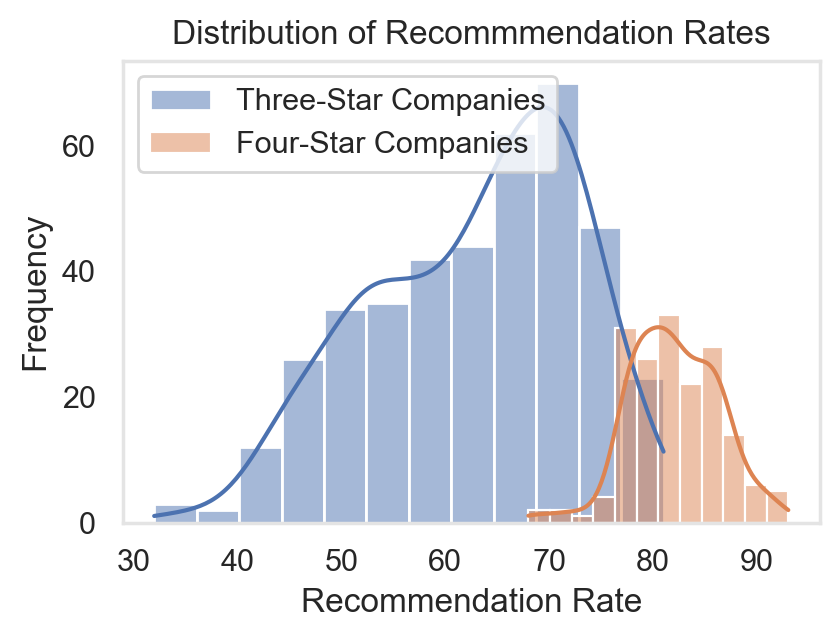

In [233]:
plt.figure(figsize=(4.5,3))
# Plot histogram for Sample 1
sns.histplot(train[train['binned_rating_int']==3]['recommended'],
             kde=True, alpha=0.5, label="Three-Star Companies")

# Plot histogram for Sample 2
sns.histplot(train[train['binned_rating_int']==4]['recommended'],
             kde=True, alpha=0.5, label="Four-Star Companies")

# Add labels and title to the plot
plt.xlabel('Recommendation Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Recommmendation Rates')

# Add legend
plt.legend()

Verify Assumptions

- Independence: We will assume the companies are independent
- Normality: We can assume normality. The samples are large 

In [234]:
train['binned_rating_int'].value_counts()[:2]

3    400
4    174
Name: binned_rating_int, dtype: int64

Verify Equal Variances

In [235]:
print(f"CEO Approval Variance for Three-Star Companies: {train[train['binned_rating_int']==3]['recommended'].var()}")
print(f"CEO Approval Variance for Four-Star Companies: {train[train['binned_rating_int']==4]['recommended'].var()}")

# Levene test
stat, p_levene = stats.levene(train[train['binned_rating_int']==3]['recommended'],
                              train[train['binned_rating_int']==4]['recommended'])
print(f'Levene Test: stat={stat}, p_value={p_levene}')
if p_levene < .05:
    print('we cannot assume equal variances')
else:
    print('we will assume equal variances')

CEO Approval Variance for Three-Star Companies: 100.89458020050125
CEO Approval Variance for Four-Star Companies: 18.4897016809514
Levene Test: stat=104.91246723547296, p_value=1.0158711075908939e-22
we cannot assume equal variances


Compute t-stat and p-value

In [236]:
stats.ttest_ind(train[train['binned_rating_int']==3]['recommended'], 
                train[train['binned_rating_int']==4]['recommended'],
                equal_var=False)

Ttest_indResult(statistic=-32.113228924910715, pvalue=4.082848561209238e-130)

There is a significant difference in CEO approvals between Three-star and Four-star companies.

In [237]:
train.groupby('binned_rating')['recommended'].mean()[1:].reset_index()

,binned_rating,recommended
0,Three,62.81250
1,Four,82.04023


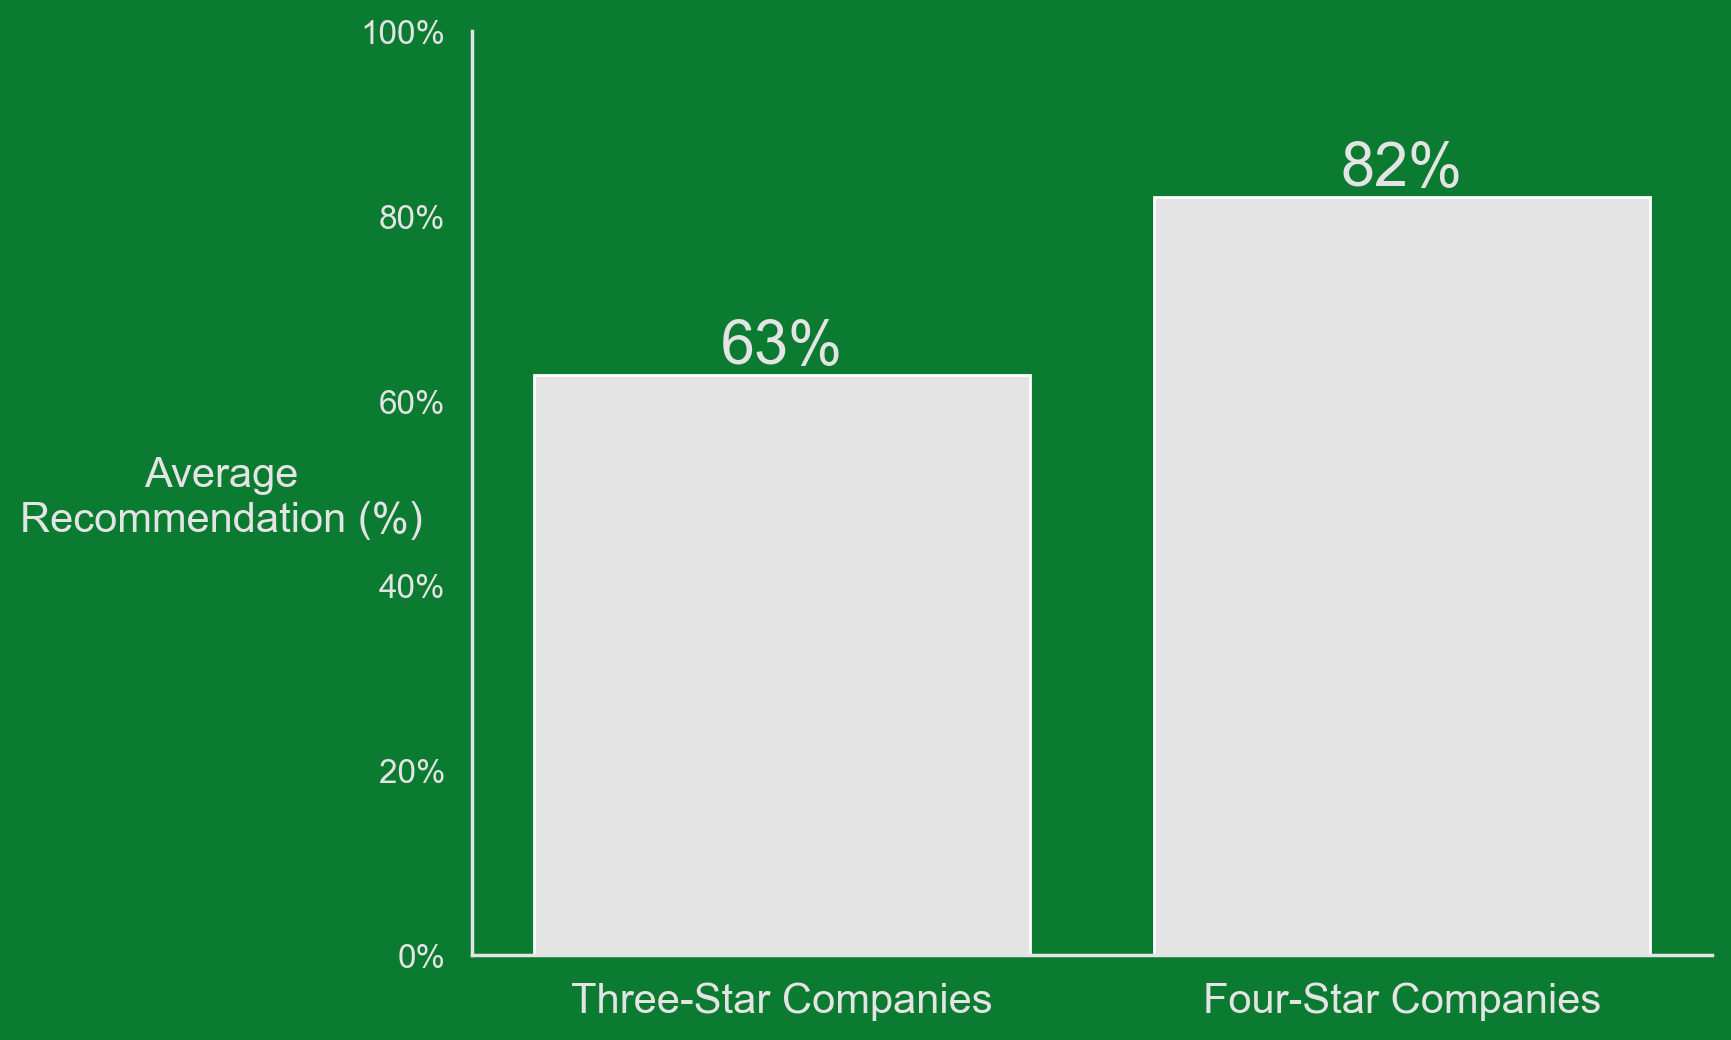

In [135]:
# Assuming you have filtered your data as follows:
ceo_approval_3 = train[train['binned_rating_int'] == 3]['recommended']
ceo_approval_4 = train[train['binned_rating_int'] == 4]['recommended']

# Calculate the means for both sets of CEO approvals
mean_approval_3 = ceo_approval_3.mean()
mean_approval_4 = ceo_approval_4.mean()

# Create a DataFrame for plotting
data = pd.DataFrame({'Binned Rating': ['Three-Star Companies', 'Four-Star Companies'],
                     'Mean Referral Percentage': [mean_approval_3, mean_approval_4]})

# Set up the plot
sns.set(style="white", rc={"axes.edgecolor": "#e4e4e4"})
plt.figure(figsize=(8, 6))
# Create the barplot
sns.barplot(x='Binned Rating', y='Mean Referral Percentage',
            data=data, color='#e4e4e4')

# Add labels and a title
plt.xlabel('')
plt.xticks(fontsize=15)
ylabel = plt.ylabel('Average\nRecommendation (%)', rotation=0,
           labelpad=50, color='#e4e4e4', fontsize=15)

ylabel.set_y(ylabel.get_position()[1] - 0.05)
plt.yticks(range(0, 101, 20),
           labels=[f'{x}%' for x in range(0, 101, 20)],
           fontsize=12)

# Annotate the bars with their values
for index, row in data.iterrows():
    plt.annotate(f'{row["Mean Referral Percentage"]:.0f}%', 
                 xy=(index, row["Mean Referral Percentage"]), 
                 ha='center', va='bottom',
                 color='#e4e4e4',
                 fontsize=22)

fig = plt.gcf()
fig.set_facecolor('#0a7b30')
ax = plt.gca()
ax.set_facecolor('#0a7b30')

ax.tick_params(axis='both', color='#e4e4e4', labelcolor='#e4e4e4')

sns.despine()

In [ ]:
import numpy as np

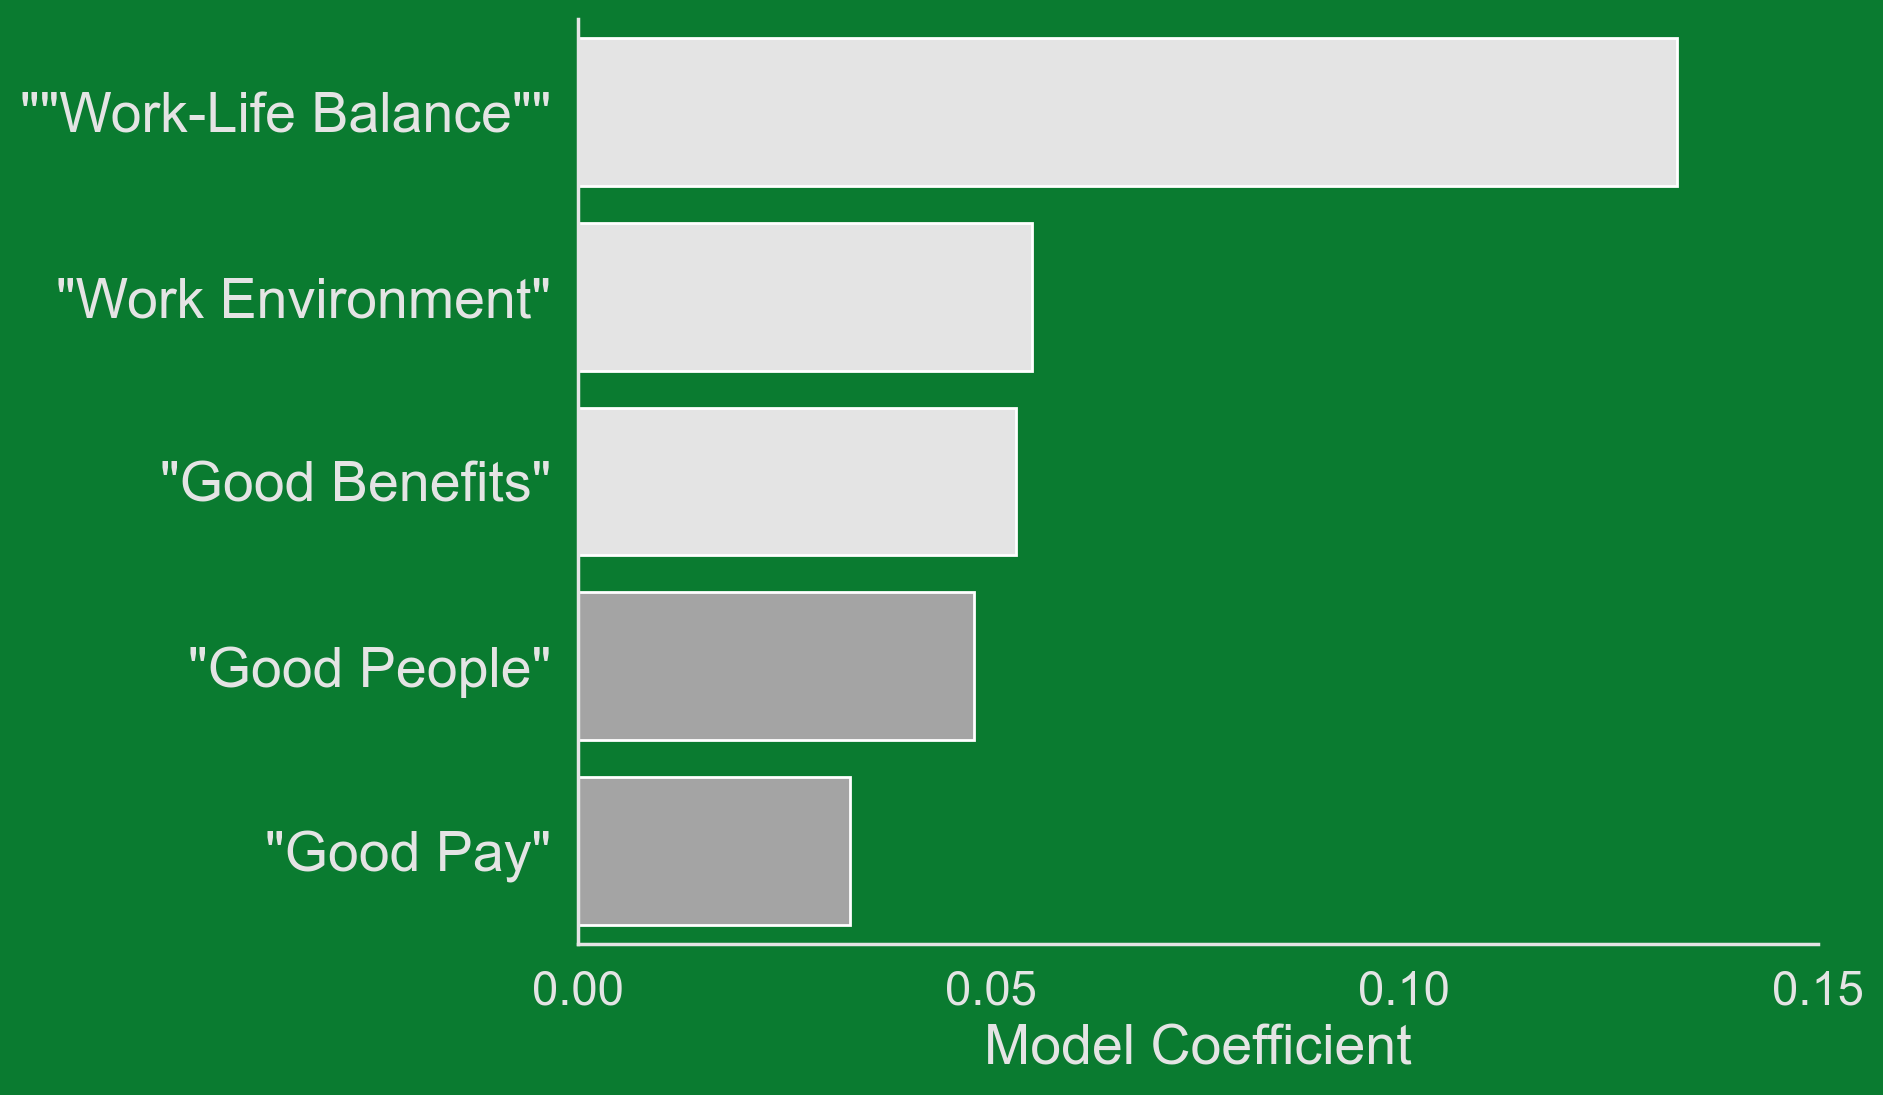

In [221]:
# Create a DataFrame from the provided coefficients
coeff_data = {
    'Feature': [
        '"Good Pay"',
        '"Good People"',
        '"Good Benefits"',
        '"Work Environment"',
        '""Work-Life Balance""'
    ],
    'Coefficient': [
        0.033,
        0.048,
        0.053,
        0.055,
        0.133
    ]
}

coeff_df = pd.DataFrame(coeff_data)

# Sort the DataFrame by the coefficient values and select the top 10
top_5_coeffs = coeff_df.sort_values(by='Coefficient', ascending=False).head(10)

# Set up the plot
sns.set(style="white", rc={"axes.edgecolor": "#e4e4e4"})
plt.figure(figsize=(8, 6))

# Define a list of colors for annotations
annotation_colors = ['#e4e4e4', '#e4e4e4', '#e4e4e4', '#a4a4a4', '#a4a4a4']
# Create the barplot
sns.barplot(x='Coefficient', y='Feature', data=top_5_coeffs,
            palette=annotation_colors)

# Add labels and a title
plt.xlabel('Model Coefficient', fontsize=20, color='#e4e4e4')
plt.xticks([0, 0.05, 0.1, 0.15], fontsize=17)
plt.ylabel('')
plt.yticks(fontsize=20)

# # Annotate the bars with their values in reverse order
# for i, (index, row) in enumerate(top_5_coeffs.iterrows()):
#     plt.annotate(f'{row["Coefficient"]:.2f}',  # Format the coefficient value
#                  xy=(row["Coefficient"]+.01, i),  # Position of the annotation
#                  ha='center', va='center',  # Center the text within the bar
#                  color=annotation_colors[i],  # Text color
#                  fontsize=16)  # Font size for annotations

fig = plt.gcf()
fig.set_facecolor('#0a7b30')
ax = plt.gca()
ax.set_facecolor('#0a7b30')

ax.tick_params(axis='both', color='#e4e4e4', labelcolor='#e4e4e4')

sns.despine()

plt.show()